In [0]:
import pandas as pd
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("train.csv")
df.isnull().any().any() # False means no null values.
#df.describe()

False

In [3]:
y = df['Label']
X = df.drop(columns=['Id', 'Label'])
X.shape

(60000, 784)

In [4]:
X.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.000483,0.006067,0.033700,0.090450,0.241383,0.392517,0.777333,2.158300,5.597000,14.485433,32.866333,45.783900,51.985883,50.779350,50.425750,53.686350,51.371150,40.467633,25.962700,10.281083,4.034833,1.929250,1.148100,0.842217,0.47675,0.262000,0.08960,0.015167,0.004783,0.020917,0.102850,0.339433,0.741917,2.058883,7.226483,17.394200,32.014417,53.019567,79.603650,100.266400,...,92.459967,90.458233,79.041600,62.473383,46.021650,44.367617,47.964333,38.793683,22.335200,9.189950,3.814733,0.622083,0.024617,0.220950,1.03375,4.379250,12.673967,21.02115,21.219867,17.159950,22.219717,30.688333,41.950650,51.574867,52.491717,46.289000,42.470617,45.183467,50.020433,46.359133,34.545900,23.297883,16.652150,17.953617,22.969333,17.967350,8.525333,2.753883,0.832950,0.072850
std,0.061507,0.292286,1.178115,2.306445,4.365543,5.702057,8.023953,13.942884,23.572943,38.252977,57.692077,65.947637,68.565341,67.919718,67.397257,69.421676,67.915419,62.725940,51.620728,32.300648,20.015361,13.871987,10.593331,9.214058,7.01254,5.295104,2.78752,1.048501,0.361104,1.133843,3.104964,6.149413,9.589874,15.716790,29.936239,47.877737,65.585449,82.247678,95.471925,99.882969,...,100.881732,99.700169,95.036194,88.766993,78.686045,77.236284,83.267721,74.407819,55.982185,37.736031,24.425300,8.175978,1.009238,4.416291,10.07838,20.894199,37.020302,49.07243,48.312498,42.208942,48.438714,55.116266,62.242895,68.555227,69.759801,67.367902,66.182219,66.754477,68.685723,66.060666,57.569109,48.952580,42.147395,43.985951,51.856475,45.225807,29.529071,17.396211,9.263115,2.131444
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000

In [0]:
X.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,44,48,147,59,0,78,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,76,...,189,113,111,113,27,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,98,33,70,72,74,46,68,37,40,31,9,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
import time
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca_train = pca.fit_transform(X_train)


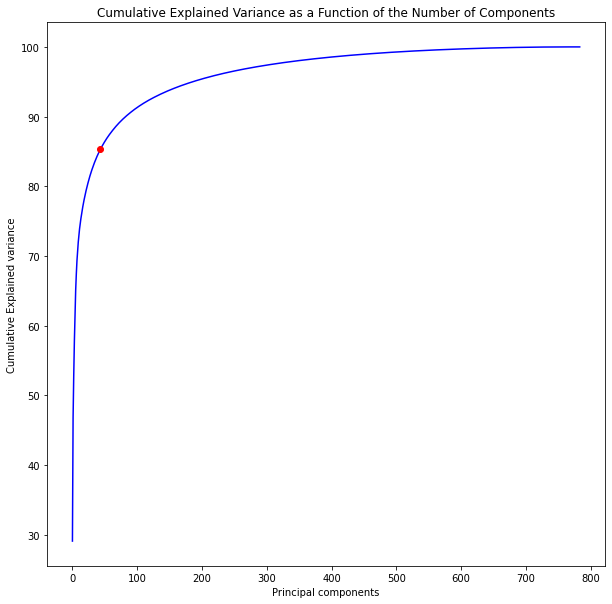

In [0]:
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(10, 10))
plt.plot(d,cumsum, color = 'blue',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.plot(43, 85.28, 'ro')

In [0]:
cumsum[43]

85.28633443058126

In [8]:
pca = PCA(n_components = 43, random_state=42)
pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)
print(pca_train.shape, pca_test.shape)

(48000, 43) (12000, 43)


In [0]:
n = [5, 15, 25, 35, 55, 65, 75, 85]

scores = list()
times = list()

for i in n:
  start = time.time()
  print("Starting", i)
  clf = KNeighborsClassifier(n_neighbors=i)
  clf.fit(pca_train, y_train)
  end = time.time()
  y_pred1 = clf.predict(pca_test)
  val = accuracy_score(y_test, y_pred1) 
  scores.append(val)
  times.append(end - start)
  print("\t", i, end - start, val)

Starting 5
	 5 0.3708333969116211 0.8596666666666667
Starting 15
	 15 0.3670952320098877 0.8638333333333333
Starting 25
	 25 0.3660869598388672 0.8634166666666667
Starting 35
	 35 0.3672776222229004 0.86025
Starting 55
	 55 0.37761759757995605 0.8549166666666667
Starting 65
	 65 0.37547850608825684 0.851
Starting 75
	 75 0.36740946769714355 0.8508333333333333
Starting 85
	 85 0.3678627014160156 0.8486666666666667


In [0]:
rf_numTrees = [5, 10, 50, 150, 200, 250, 300]
rf_maxDepth = [5, 10, None]

scores_rf = list()
times_rf = list()

# Training Random for various values of Maximum Tree Depth and Number of Trees.
for i in rf_numTrees:
    score = list()
    timee = list()
    for j in rf_maxDepth:
        start = time.time()
        print("Starting", i, j)
        # Classifying with different maximum depths and number of trees.
        clf = RandomForestClassifier(random_state = 42, max_depth = j, n_estimators = i)
        clf.fit(pca_train, y_train)
        end = time.time()
        y_pred1 = clf.predict(pca_test)
        val = accuracy_score(y_test, y_pred1)
        score.append(val)
        print("Score = ", val, "Time = ", end - start)
        timee.append(end - start)
    scores_rf.append(score)
    times_rf.append(timee)

Starting 5 5
Score =  0.6383333333333333 Time =  0.7804181575775146
Starting 5 10
Score =  0.7475 Time =  1.3223371505737305
Starting 5 None
Score =  0.8045833333333333 Time =  1.9677670001983643
Starting 10 5
Score =  0.66675 Time =  1.5307331085205078
Starting 10 10
Score =  0.7760833333333333 Time =  2.6460258960723877
Starting 10 None
Score =  0.8363333333333334 Time =  3.922699451446533
Starting 50 5
Score =  0.7003333333333334 Time =  7.551090955734253
Starting 50 10
Score =  0.816 Time =  12.943775415420532
Starting 50 None
Score =  0.8674166666666666 Time =  19.428619146347046
Starting 150 5
Score =  0.7124166666666667 Time =  22.852312088012695
Starting 150 10
Score =  0.8158333333333333 Time =  39.0233428478241
Starting 150 None
Score =  0.872 Time =  58.33951663970947
Starting 200 5
Score =  0.7156666666666667 Time =  30.41138219833374
Starting 200 10
Score =  0.8170833333333334 Time =  52.08400321006775
Starting 200 None
Score =  0.87325 Time =  77.86222434043884
Starting 2

In [0]:
rf_numTrees = [350, 400, 450]
rf_maxDepth = [5, 10, None]

scores_rf1 = list()
times_rf1 = list()

# Training Random for various values of Maximum Tree Depth and Number of Trees.
for i in rf_numTrees:
    score = list()
    timee = list()
    for j in rf_maxDepth:
        start = time.time()
        print("Starting", i, j)
        # Classifying with different maximum depths and number of trees.
        clf = RandomForestClassifier(random_state = 42, max_depth = j, n_estimators = i)
        clf.fit(pca_train, y_train)
        end = time.time()
        y_pred1 = clf.predict(pca_test)
        val = accuracy_score(y_test, y_pred1)
        score.append(val)
        print("Score = ", val, "Time = ", end - start)
        timee.append(end - start)
    scores_rf1.append(score)
    times_rf1.append(timee)

Starting 350 5
Score =  0.713 Time =  52.082520484924316
Starting 350 10
Score =  0.8181666666666667 Time =  91.57957077026367
Starting 350 None
Score =  0.87425 Time =  135.21382474899292
Starting 400 5
Score =  0.71225 Time =  60.189876079559326
Starting 400 10
Score =  0.8174166666666667 Time =  102.72591137886047
Starting 400 None
Score =  0.8746666666666667 Time =  154.76387858390808
Starting 450 5
Score =  0.7126666666666667 Time =  67.21759080886841
Starting 450 10
Score =  0.8181666666666667 Time =  117.87778520584106
Starting 450 None
Score =  0.8745833333333334 Time =  173.31302165985107


In [11]:
clf = RandomForestClassifier(random_state = 42, max_depth = None, n_estimators = 400)
clf.fit(pca_train, y_train)

start = time.time()
y_pred1 = clf.predict(pca_test)
end = time.time()
print(end - start)

1.1846532821655273


In [10]:
print(accuracy_score(y_test, y_pred1))

0.8746666666666667


In [14]:
clf = KNeighborsClassifier(n_neighbors=15)
clf.fit(pca_train, y_train)

start = time.time()
y_pred1 = clf.predict(pca_test)
end = time.time()
print(end - start)

8.272461891174316


In [15]:
print(accuracy_score(y_test, y_pred1))

0.8638333333333333
